#  <center> Speech Emotion Recognition <center>

# Importing Libraries

In [46]:
!apt-get update
!apt-get install -y libsndfile1

Get:1 http://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1581 B]
Err:1 http://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
  The following signatures couldn't be verified because the public key is not available: NO_PUBKEY A4B469963BF863CC
Ign:2 http://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:4 http://security.ubuntu.com/ubuntu bionic-security InRelease              
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease                        
Get:7 http://packages.cloud.google.com/apt gcsfuse-bionic InRelease [5025 B]
Hit:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease                
Hit:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease       
Err:7 http://packages.cloud.google.com/apt gcsfuse-bionic InRelease     
  The following signatures

In [47]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio


from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

## Data Preparation


In [48]:
# Paths for data.
Ravdess = "/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/"
Crema = "/kaggle/input/cremad/AudioWAV/"
Tess = "/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/"
Savee = "/kaggle/input/surrey-audiovisual-expressed-emotion-savee/ALL/"

##  <center> 1. Ravdess Dataframe <center>

In [49]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

,Emotions,Path
0,surprise,/kaggle/input/ravdess-emotional-speech-audio/a...
1,neutral,/kaggle/input/ravdess-emotional-speech-audio/a...
2,disgust,/kaggle/input/ravdess-emotional-speech-audio/a...
3,disgust,/kaggle/input/ravdess-emotional-speech-audio/a...
4,neutral,/kaggle/input/ravdess-emotional-speech-audio/a...


## <center>2. Crema DataFrame</center>

In [50]:
'''crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()'''

"crema_directory_list = os.listdir(Crema)\n\nfile_emotion = []\nfile_path = []\n\nfor file in crema_directory_list:\n    # storing file paths\n    file_path.append(Crema + file)\n    # storing file emotions\n    part=file.split('_')\n    if part[2] == 'SAD':\n        file_emotion.append('sad')\n    elif part[2] == 'ANG':\n        file_emotion.append('angry')\n    elif part[2] == 'DIS':\n        file_emotion.append('disgust')\n    elif part[2] == 'FEA':\n        file_emotion.append('fear')\n    elif part[2] == 'HAP':\n        file_emotion.append('happy')\n    elif part[2] == 'NEU':\n        file_emotion.append('neutral')\n    else:\n        file_emotion.append('Unknown')\n        \n# dataframe for emotion of files\nemotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])\n\n# dataframe for path of files.\npath_df = pd.DataFrame(file_path, columns=['Path'])\nCrema_df = pd.concat([emotion_df, path_df], axis=1)\nCrema_df.head()"

##  <center> 3. TESS dataset <center>

In [51]:
'''tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()'''

"tess_directory_list = os.listdir(Tess)\n\nfile_emotion = []\nfile_path = []\n\nfor dir in tess_directory_list:\n    directories = os.listdir(Tess + dir)\n    for file in directories:\n        part = file.split('.')[0]\n        part = part.split('_')[2]\n        if part=='ps':\n            file_emotion.append('surprise')\n        else:\n            file_emotion.append(part)\n        file_path.append(Tess + dir + '/' + file)\n        \n# dataframe for emotion of files\nemotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])\n\n# dataframe for path of files.\npath_df = pd.DataFrame(file_path, columns=['Path'])\nTess_df = pd.concat([emotion_df, path_df], axis=1)\nTess_df.head()"

##  <center> 4. CREMA-D dataset <center>
The audio files in this dataset are named in such a way that the prefix letters describes the emotion classes as follows:

* 'a' = 'anger'
* 'd' = 'disgust'
* 'f' = 'fear'
* 'h' = 'happiness'
* 'n' = 'neutral'
* 'sa' = 'sadness'
* 'su' = 'surprise'

In [52]:
'''savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()'''

"savee_directory_list = os.listdir(Savee)\n\nfile_emotion = []\nfile_path = []\n\nfor file in savee_directory_list:\n    file_path.append(Savee + file)\n    part = file.split('_')[1]\n    ele = part[:-6]\n    if ele=='a':\n        file_emotion.append('angry')\n    elif ele=='d':\n        file_emotion.append('disgust')\n    elif ele=='f':\n        file_emotion.append('fear')\n    elif ele=='h':\n        file_emotion.append('happy')\n    elif ele=='n':\n        file_emotion.append('neutral')\n    elif ele=='sa':\n        file_emotion.append('sad')\n    else:\n        file_emotion.append('surprise')\n        \n# dataframe for emotion of files\nemotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])\n\n# dataframe for path of files.\npath_df = pd.DataFrame(file_path, columns=['Path'])\nSavee_df = pd.concat([emotion_df, path_df], axis=1)\nSavee_df.head()"

In [53]:
# creating Dataframe using all the 4 dataframes we created so far.
# data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path = pd.concat([Ravdess_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.shape

(1440, 2)

## Data Visualisation and Exploration

In [54]:
data_path.head()

,Emotions,Path
0,surprise,/kaggle/input/ravdess-emotional-speech-audio/a...
1,neutral,/kaggle/input/ravdess-emotional-speech-audio/a...
2,disgust,/kaggle/input/ravdess-emotional-speech-audio/a...
3,disgust,/kaggle/input/ravdess-emotional-speech-audio/a...
4,neutral,/kaggle/input/ravdess-emotional-speech-audio/a...


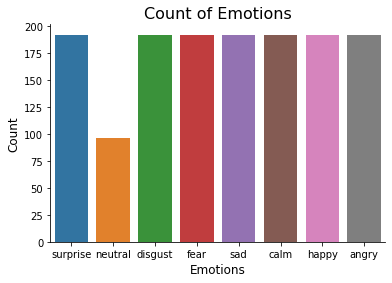

In [55]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

## Data Augmentation


In [56]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

#### 1. Simple Audio

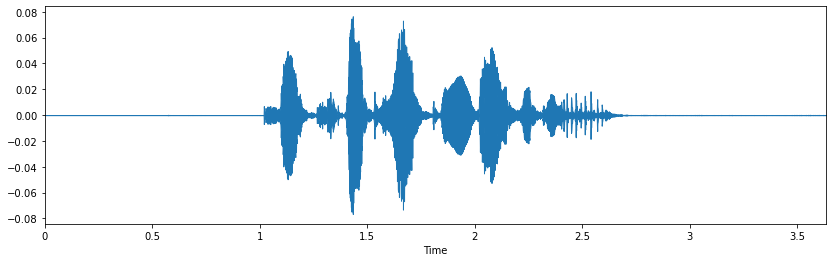

In [57]:
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=data, sr=sample_rate)
Audio(path)

#### 2. Noise Injection

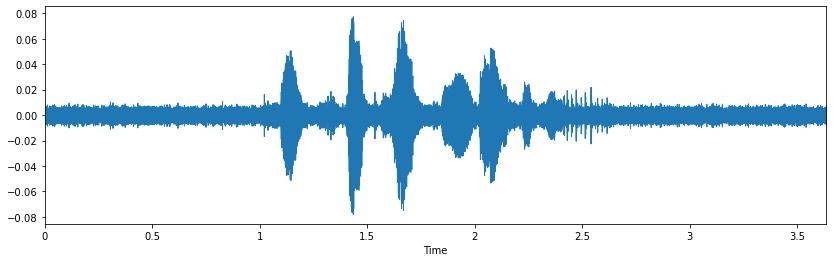

In [58]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

#### 3. Stretching

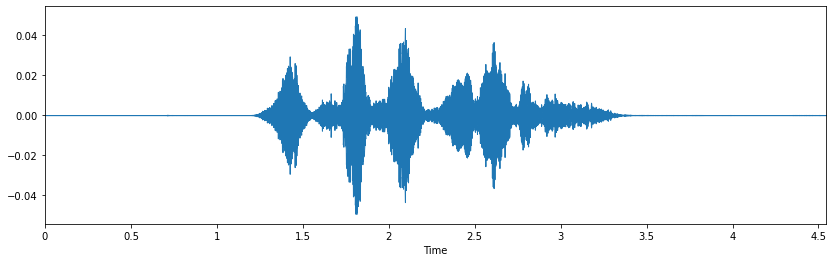

In [59]:
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

#### 4. Shifting

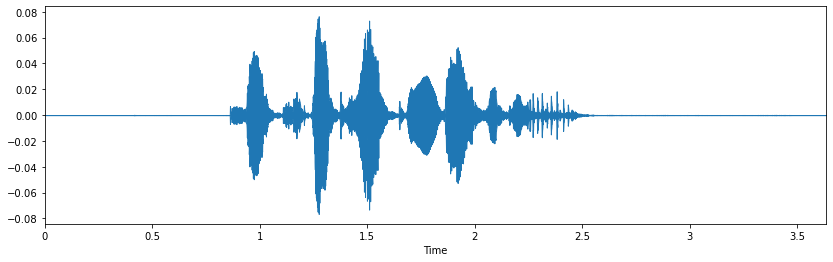

In [60]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

#### 5. Pitch

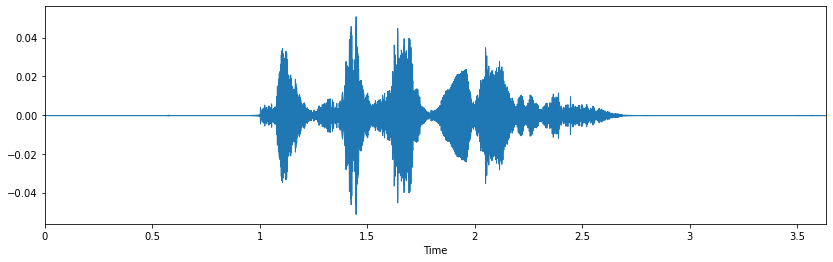

In [61]:
x = pitch(data, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

## Feature Extraction


In [62]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result

In [63]:
print(data_path.shape)
data_path.head()

(1440, 2)


,Emotions,Path
0,surprise,/kaggle/input/ravdess-emotional-speech-audio/a...
1,neutral,/kaggle/input/ravdess-emotional-speech-audio/a...
2,disgust,/kaggle/input/ravdess-emotional-speech-audio/a...
3,disgust,/kaggle/input/ravdess-emotional-speech-audio/a...
4,neutral,/kaggle/input/ravdess-emotional-speech-audio/a...


In [64]:
data_path['Emotions'].value_counts()

sad         192
disgust     192
fear        192
angry       192
surprise    192
happy       192
calm        192
neutral      96
Name: Emotions, dtype: int64

In [65]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    print(path," : ",emotion)
    feature = get_features(path)
#     print(feature)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_02/03-01-08-01-01-01-02.wav  :  surprise
/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_02/03-01-01-01-01-01-02.wav  :  neutral
/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_02/03-01-07-02-01-02-02.wav  :  disgust
/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_02/03-01-07-01-01-02-02.wav  :  disgust
/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_02/03-01-01-01-02-01-02.wav  :  neutral
/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_02/03-01-06-02-02-01-02.wav  :  fear
/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_02/03-01-04-01-02-01-02.wav  :  sad
/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_02/03-01-01-01-01-02-02.wav  :  neutral
/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24

In [66]:
len(X), len(Y), data_path.Path.shape

(4320, 4320, (1440,))

In [67]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,labels
0,0.236364,0.682681,0.670631,0.614893,0.577180,0.557824,0.635630,0.667002,0.664258,0.670328,...,0.000234,0.000236,0.000138,0.000129,0.000300,0.000354,0.000212,0.000081,1.317474e-05,surprise
1,0.302459,0.702076,0.703315,0.704808,0.683501,0.678392,0.710045,0.698178,0.681065,0.669587,...,0.000484,0.000507,0.000381,0.000375,0.000576,0.000578,0.000461,0.000336,2.766980e-04,surprise
2,0.173148,0.671824,0.640110,0.576241,0.517699,0.501699,0.615085,0.679769,0.680854,0.671641,...,0.000044,0.000046,0.000047,0.000038,0.000026,0.000034,0.000044,0.000017,8.125645e-07,surprise
3,0.249344,0.623057,0.581343,0.598568,0.622959,0.593760,0.598832,0.650681,0.699159,0.683510,...,0.000018,0.000016,0.000013,0.000012,0.000007,0.000008,0.000007,0.000002,2.394534e-07,neutral
4,0.340337,0.712232,0.708196,0.749727,0.782155,0.747077,0.680855,0.702510,0.746265,0.734038,...,0.000358,0.000371,0.000364,0.000362,0.000349,0.000358,0.000355,0.000360,3.557051e-04,neutral


## Data Preparation


In [68]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [69]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [70]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3240, 162), (3240, 8), (1080, 162), (1080, 8))

In [71]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3240, 162), (3240, 8), (1080, 162), (1080, 8))

In [72]:
x_train.shape

(3240, 162)

In [73]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3240, 162, 1), (3240, 8), (1080, 162, 1), (1080, 8))

## Modelling

In [74]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 162, 256)          1536      
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 81, 256)           0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 81, 256)           327936    
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 41, 256)           0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 41, 128)           163968    
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 21, 128)           0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 21, 128)          

In [75]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

Train on 3240 samples, validate on 1080 samples
Epoch 1/50
3240/3240 [==============================] - 1s 275us/step - loss: 1.9926 - accuracy: 0.1877 - val_loss: 1.9534 - val_accuracy: 0.2343
Epoch 2/50
3240/3240 [==============================] - 1s 155us/step - loss: 1.9300 - accuracy: 0.2262 - val_loss: 1.8715 - val_accuracy: 0.2352
Epoch 3/50
3240/3240 [==============================] - 0s 141us/step - loss: 1.8850 - accuracy: 0.2503 - val_loss: 1.8013 - val_accuracy: 0.2880
Epoch 4/50
3240/3240 [==============================] - 0s 142us/step - loss: 1.8158 - accuracy: 0.2864 - val_loss: 1.7372 - val_accuracy: 0.3028
Epoch 5/50
3240/3240 [==============================] - 0s 141us/step - loss: 1.7792 - accuracy: 0.3025 - val_loss: 1.6778 - val_accuracy: 0.3389
Epoch 6/50
3240/3240 [==============================] - 0s 144us/step - loss: 1.7292 - accuracy: 0.3198 - val_loss: 1.6489 - val_accuracy: 0.3565
Epoch 7/50
3240/3240 [==============================] - 0s 141us/step - loss

1080/1080 [==============================] - 0s 80us/step
Accuracy of our model on test data :  60.277777910232544 %


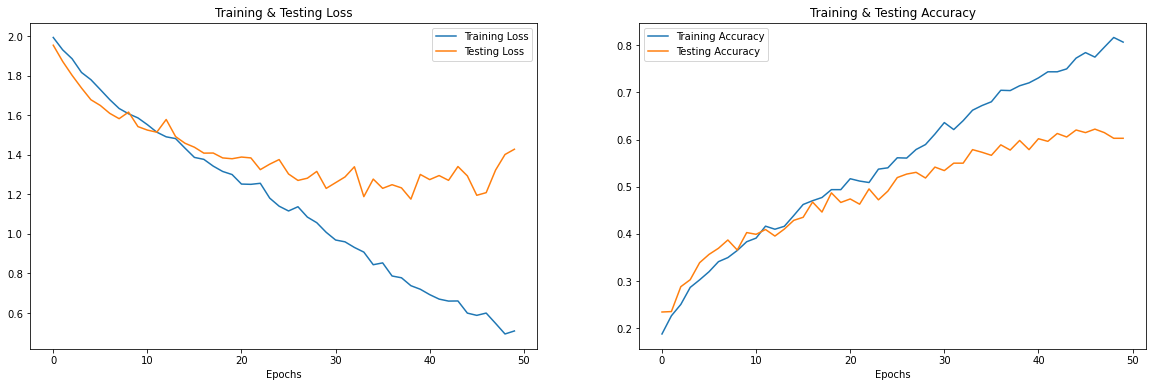

In [76]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [77]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

In [78]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

,Predicted Labels,Actual Labels
0,fear,fear
1,neutral,neutral
2,surprise,sad
3,disgust,neutral
4,fear,fear
5,disgust,angry
6,fear,fear
7,fear,fear
8,disgust,disgust
9,calm,calm


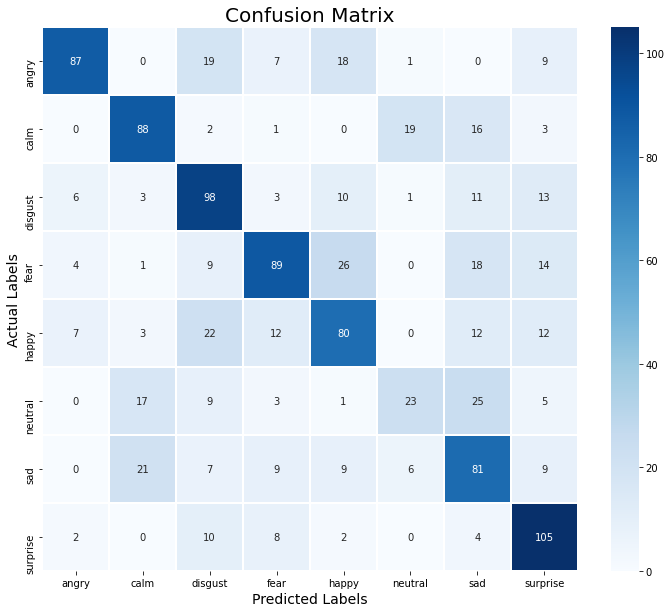

In [79]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.82      0.62      0.70       141
        calm       0.66      0.68      0.67       129
     disgust       0.56      0.68      0.61       145
        fear       0.67      0.55      0.61       161
       happy       0.55      0.54      0.54       148
     neutral       0.46      0.28      0.35        83
         sad       0.49      0.57      0.52       142
    surprise       0.62      0.80      0.70       131

    accuracy                           0.60      1080
   macro avg       0.60      0.59      0.59      1080
weighted avg       0.61      0.60      0.60      1080



- We can see our model is more accurate in predicting surprise, angry emotions and it makes sense also because audio files of these emotions differ to other audio files in a lot of ways like pitch, speed etc..
- We overall achieved 61% accuracy on our test data and its decent but we can improve it more by applying more augmentation techniques and using other feature extraction methods.